In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

In [178]:
# 🧠 Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Diogo
[nltk_data]     Rodrigues\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [179]:
#!pip install nltk
#!pip install strings

In [180]:
train = pd.read_csv("train.csv") 

In [181]:
test = pd.read_csv("test.csv") 

In [182]:
train.head(10)

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0
5,$FTI - TechnipFMC downgraded at Berenberg but ...,0
6,$GM - GM loses a bull https://t.co/tdUfG5HbXy,0
7,$GM: Deutsche Bank cuts to Hold https://t.co/7...,0
8,$GTT: Cowen cuts to Market Perform,0
9,$HNHAF $HNHPD $AAPL - Trendforce cuts iPhone e...,0


In [183]:
count = train['text'].str.strip().str.startswith('$').sum()

print(f"Number of rows where text starts with $: {count}")

Number of rows where text starts with $: 1292


Here we have a lot of nonsense words that start with '$' that may not be useful to our future model


In [184]:
# Count how many rows contain http, https, or www
url_count = train['text'].str.contains(r'(http|https|www)', regex=True).sum()

print(f"Number of phrases containing a URL: {url_count}")

Number of phrases containing a URL: 4470


C:\Users\Diogo Rodrigues\AppData\Local\Temp\ipykernel_20556\12421402.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  url_count = train['text'].str.contains(r'(http|https|www)', regex=True).sum()


URL's like (hhtp, https, www) on our text in most cases are not useful and can be safely removed as well.

In [185]:
# Remove $TICKERs
train['clean_text'] = train['text'].str.replace(r'\$\w+', '', regex=True)

# Remove URLs
train['clean_text'] = train['clean_text'].str.replace(r'http\S+', '', regex=True)

# Remove leading : or - characters
train['clean_text'] = train['clean_text'].str.replace(r'^[\s:-]+', '', regex=True)

# Normalize spacing
train['clean_text'] = train['clean_text'].str.replace(r'\s+', ' ', regex=True).str.strip()



train['text'] = train['clean_text']
train.drop(columns=['clean_text'], inplace=True)


In [186]:
# Remove $TICKERs
test['clean_text'] = test['text'].str.replace(r'\$\w+', '', regex=True)

# Remove URLs
test['clean_text'] = test['clean_text'].str.replace(r'http\S+', '', regex=True)

# Remove leading : or - characters
test['clean_text'] = test['clean_text'].str.replace(r'^[\s:-]+', '', regex=True)

# Normalize spacing
test['clean_text'] = test['clean_text'].str.replace(r'\s+', ' ', regex=True).str.strip()


test['text'] = test['clean_text']
test.drop(columns=['clean_text'], inplace=True)

# Stop words ("English")

In [187]:
stop = set(stopwords.words('english'))

# Lemmanization

In [188]:
lemma = WordNetLemmatizer()

In [189]:
def clean(text_list, lemmatize, stemmer):

    updates = []

    for j in tqdm(text_list):

        text = j

        #LOWERCASE TEXT
        text = text.lower()

        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        # [^&] - Returns a match for any character EXCEPT &.
        # a-zA-Z - Returns a match for any character alphabetically between a and z, lower case or upper case.
        text = re.sub("br", "", text)  # remove "br"
        text = re.sub(r'http\S+', '', text)  # remove URLs
        text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)  # remove punctuation


        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])

        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())

        #Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())

        updates.append(text)

    return updates

In [190]:
updated_train = clean(train['text'], lemmatize = True, stemmer = False)

100%|██████████| 9543/9543 [00:00<00:00, 27183.02it/s]


In [191]:
updated_train

['jpmorgan reel expectation beyond meat',
 'nomura point booking weakness carnival royal caribbean',
 'cemex cut credit suisse j p morgan weak building outlook',
 'btig research cut neutral',
 'funko slide piper jaffray pt cut',
 'technipfmc downgraded berenberg called top pick deutsche bank',
 'gm loses bull',
 'deutsche bank cut hold',
 'cowen cut market perform',
 'trendforce cut iphone estimate foxconn delay',
 'moody warns harley davidson',
 'citing aero tie well slash pt hexcel',
 'intelsat cut market perform raymond james',
 'compass point cut sell',
 'muddy water go short luckin coffee',
 'mantech downgraded ahead difficult comp',
 'oppenheimer cut perform',
 'mplx cut credit suisse potential dilution marathon strategic review',
 'imperial downgrade msg network amid sport free airwave',
 'piper hit materialise sideline',
 'hovde group cut market perform',
 'new netflix bear step',
 'shopify loses bull',
 'nomura instinet loses confidence extended stay america',
 'twilio get str

In [192]:
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [193]:
update_df(train, updated_train)
train.head()

,text,label
0,JPMorgan reels in expectations on Beyond Meat,0
1,Nomura points to bookings weakness at Carnival...,0
2,"Cemex cut at Credit Suisse, J.P. Morgan on wea...",0
3,BTIG Research cuts to Neutral,0
4,Funko slides after Piper Jaffray PT cut,0


# Extract Features Using Bag of Words

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [195]:
vectorizer = CountVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train['text'])
y_train = train['label']

# Create Validation Set to Evaluate Model

In [196]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# LogisticRegression

In [197]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000, C=0.1)


# If using validation:
model.fit(X_tr, y_tr)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000)

# Evaluate on Validation Set

In [198]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on training data
train_preds = model.predict(X_tr)
print("Training set evaluation:")
print("Accuracy:", accuracy_score(y_tr, train_preds))
print(classification_report(y_tr, train_preds))

# Predict on validation data
val_preds = model.predict(X_val)
print("Validation set evaluation:")
print("Accuracy:", accuracy_score(y_val, val_preds))
print(classification_report(y_val, val_preds))

Training set evaluation:
Accuracy: 0.8680901231333508
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1154
           1       0.78      0.87      0.82      1538
           2       0.96      0.87      0.91      4942

    accuracy                           0.87      7634
   macro avg       0.81      0.87      0.84      7634
weighted avg       0.88      0.87      0.87      7634

Validation set evaluation:
Accuracy: 0.7815610267155579
              precision    recall  f1-score   support

           0       0.56      0.66      0.60       288
           1       0.67      0.71      0.69       385
           2       0.88      0.83      0.86      1236

    accuracy                           0.78      1909
   macro avg       0.71      0.73      0.72      1909
weighted avg       0.79      0.78      0.79      1909



# Transform Test Data and Predict

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

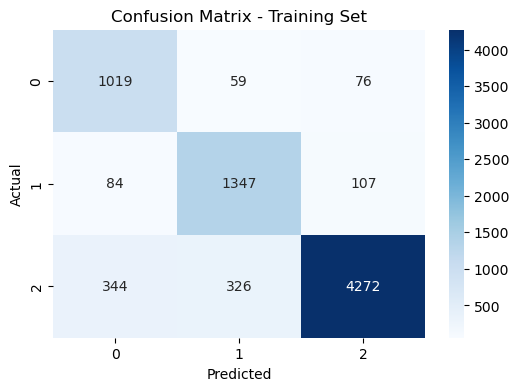

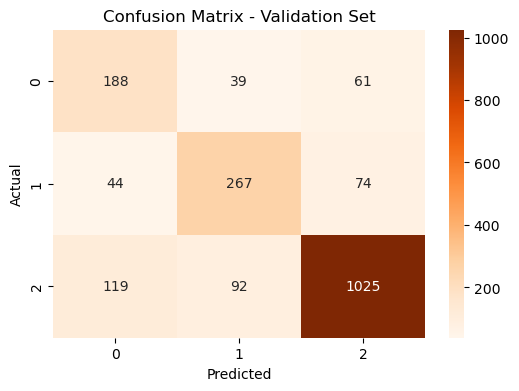

In [ ]:
# Confusion Matrix for Training Data
train_cm = confusion_matrix(y_tr, train_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Validation Data
val_cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**Training Set Confusion Matrix**

Most Neutral (2) are correctly predicted → Good

Bearish (0) and Bullish (1) get confused with each other and with Neutral

Still, most of the correct predictions lie on the diagonal

**Validation Set Confusion Matrix**

Neutral (2) class again dominates and is predicted well.

Bearish (0) is often misclassified as Neutral → 61 cases.

Bullish (1) also misclassified → especially as Neutral (74 cases).

# SVM

In [ ]:
# Split from clean text
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    train['text'], train['label'],
    test_size=0.2, stratify=train['label'], random_state=42
)

# Now this works — raw text in pipeline
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('clf', LinearSVC(class_weight='balanced', max_iter=2000))
])

svm_model.fit(X_train, y_train)

svm_preds = svm_model.predict(X_val)

from sklearn.metrics import classification_report, accuracy_score
print("SVM Accuracy:", accuracy_score(y_val, svm_preds))
print(classification_report(y_val, svm_preds))


SVM Accuracy: 0.8046097433211106
              precision    recall  f1-score   support

           0       0.64      0.61      0.63       288
           1       0.71      0.69      0.70       385
           2       0.87      0.89      0.88      1236

    accuracy                           0.80      1909
   macro avg       0.74      0.73      0.73      1909
weighted avg       0.80      0.80      0.80      1909



c:\Users\Diogo Rodrigues\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# XGBoost (Gradient Boosting)

In [ ]:
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', max_depth=5, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

# Predict & Evaluate
xgb_preds = xgb_model.predict(X_val_tfidf)
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_preds))
print(classification_report(y_val, xgb_preds))


c:\Users\Diogo Rodrigues\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:04:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7768465165007857
              precision    recall  f1-score   support

           0       0.76      0.35      0.48       288
           1       0.79      0.50      0.61       385
           2       0.78      0.96      0.86      1236

    accuracy                           0.78      1909
   macro avg       0.78      0.60      0.65      1909
weighted avg       0.78      0.78      0.75      1909



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Predict & Evaluate
rf_preds = rf_model.predict(X_val_tfidf)
print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))


Random Forest Accuracy: 0.7752750130958617
              precision    recall  f1-score   support

           0       0.81      0.32      0.46       288
           1       0.79      0.49      0.61       385
           2       0.77      0.97      0.86      1236

    accuracy                           0.78      1909
   macro avg       0.79      0.59      0.64      1909
weighted avg       0.78      0.78      0.75      1909



### 📊 Model Performance on Validation Set


| Model               | Accuracy | Precision (Macro) | Recall (Macro) | F1-score (Macro) |
|--------------------|----------|-------------------|----------------|------------------|
| Logistic Regression| 0.775    | 0.70              | 0.73           | 0.71             |
| SVM                | 0.805    | 0.74              | 0.73           | 0.73             |
| XGBoost            | 0.777    | 0.78              | 0.60           | 0.65             |
| Random Forest      | 0.775    | 0.79              | 0.59           | 0.64             |

Best overall accuracy: SVM (80.5%)

Best F1-score (Macro): SVM (0.73)

XGBoost & Random Forest struggle with class imbalance (especially class 0).

SVM and Logistic Regression perform more consistently across all classes.

# Submit SVM predictions on test set

In [201]:
# 1. Generate predictions on the test data
test_preds = svm_model.predict(test['text'])

# 2. Add the predictions as a new column in your test DataFrame
test['predicted_label'] = test_preds

# 3. Save to CSV for submission
test[['text', 'predicted_label']].to_csv('final_submission.csv', index=False)


In [202]:
label_counts = test['predicted_label'].value_counts()

print(label_counts)

predicted_label
2    1560
1     471
0     357
Name: count, dtype: int64
